# Churn Modeling by using ANN

# Import the libraries

In [140]:
import pandas as pd
import numpy as np

In [141]:
df=pd.read_csv(r"C:\Users\RAHUL SHARMA\Desktop\Churn_Modelling.csv")

In [142]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
df.shape

(10000, 14)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [145]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [146]:
# Dropping Some unnecessary columns fro the dataset

In [147]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [148]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [149]:
# Divide into the independent and dependent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [150]:
geography=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [151]:
# Drop the Existing column of Geogarphy and Gender
X.drop(['Geography','Gender'],axis=True,inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [152]:
# concatenate with the dataset
X=pd.concat([X,geography,gender],axis=1)

In [153]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [154]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [155]:
# Splitting the dataset in to the training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [156]:
# Feature Engineering

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [157]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit(X_test)

In [158]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [159]:
X_test

StandardScaler()

In [160]:
X_train.shape

(8000, 11)

In [161]:
!pip install tensorflow

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [163]:
# Lets initialize the ANN
classifier=Sequential()

In [164]:
# Adding the input layer
classifier.add(Dense(units=11,activation='ReLU'))

In [165]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='ReLU'))

In [166]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='ReLU'))

In [167]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [168]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [169]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [170]:
# Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [171]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=70,callbacks=early_stopping)

Epoch 1/70
536/536 [==============================] - 3s 3ms/step - loss: 0.4345 - accuracy: 0.8158 - val_loss: 0.3993 - val_accuracy: 0.8330
Epoch 2/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3724 - accuracy: 0.8474 - val_loss: 0.3716 - val_accuracy: 0.8376
Epoch 3/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3555 - accuracy: 0.8539 - val_loss: 0.3671 - val_accuracy: 0.8448
Epoch 4/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3507 - accuracy: 0.8563 - val_loss: 0.3654 - val_accuracy: 0.8497
Epoch 5/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3473 - accuracy: 0.8614 - val_loss: 0.3792 - val_accuracy: 0.8493
Epoch 6/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3458 - accuracy: 0.8586 - val_loss: 0.3636 - val_accuracy: 0.8512
Epoch 7/70
536/536 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.8578 - val_loss: 0.3605 - val_accuracy: 0.8531
Epoch 

In [172]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [173]:
import matplotlib.pyplot as plt

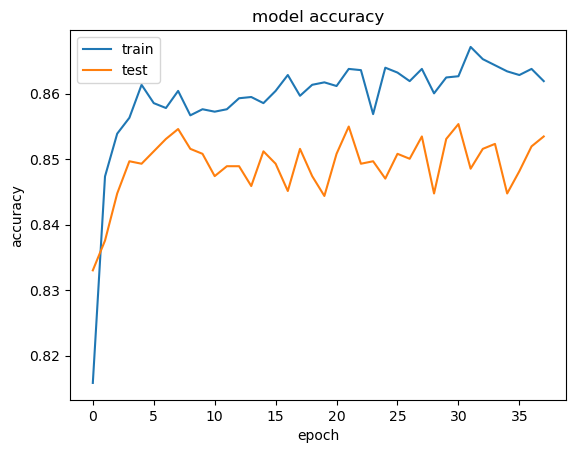

In [174]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

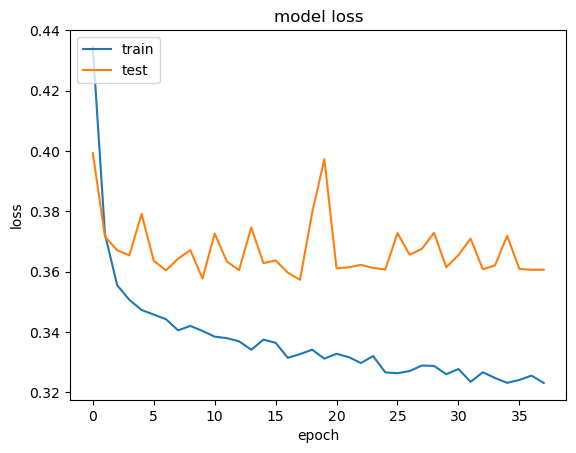

In [175]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [181]:
classifier.get_weights()

[array([[-0.43520942, -0.5780671 , -0.9664252 , -0.45092183, -1.1354398 ,
         -0.8433709 ,  0.11238856,  1.3811624 , -0.47778797, -0.28063545,
         -0.30943286],
        [ 0.44994268,  1.663885  , -2.4983225 ,  0.50599265,  1.4621222 ,
          0.18922092, -1.251765  , -1.511099  , -2.5344615 ,  2.097437  ,
          0.7676198 ],
        [ 0.57847357,  1.0383396 ,  0.00784444,  0.38302338,  0.49162176,
          1.3288571 ,  0.98420686, -0.65063393,  0.75174034, -1.1370351 ,
         -2.2272959 ],
        [-2.2392032 ,  0.17673075, -0.12487963,  0.6577617 , -0.31834257,
         -1.8402736 , -3.7299857 , -0.95364755,  0.02208268, -1.881375  ,
          0.3671685 ],
        [-2.8936357 , -0.741148  ,  0.07620409,  3.4202178 , -3.5699687 ,
          0.09446441, -0.5605069 , -0.5151013 , -2.292327  , -0.77327937,
          0.2661709 ],
        [-0.1716007 ,  1.0021002 , -0.23410259, -0.30316508, -0.7743996 ,
         -0.99439955, -1.092758  ,  1.2456445 , -1.2660745 , -0.2464486